In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import importlib
import euler_utils
import plotting_utils
importlib.reload(euler_utils)
importlib.reload(plotting_utils)

<module 'plotting_utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/plotting_utils.py'>

In [3]:
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'

In [4]:
data_10_pct_average_shapefile = euler_utils.read_output(work_folder + 'no_rejections_4000_10_pct_average_shapefile')
euler_utils.compute_delay_factor_from_estimated(data_10_pct_average_shapefile['drt_trips_stats'])

100%|██████████| 51/51 [00:00<00:00, 609.62it/s]


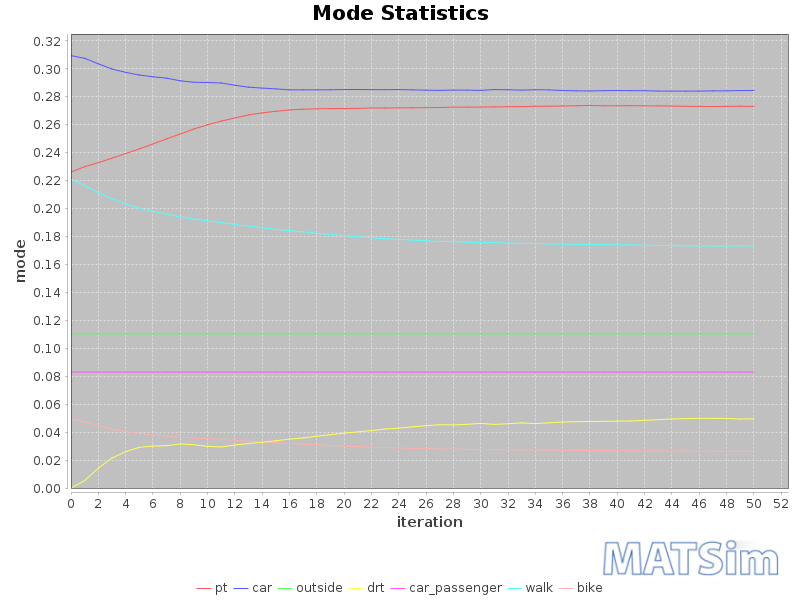

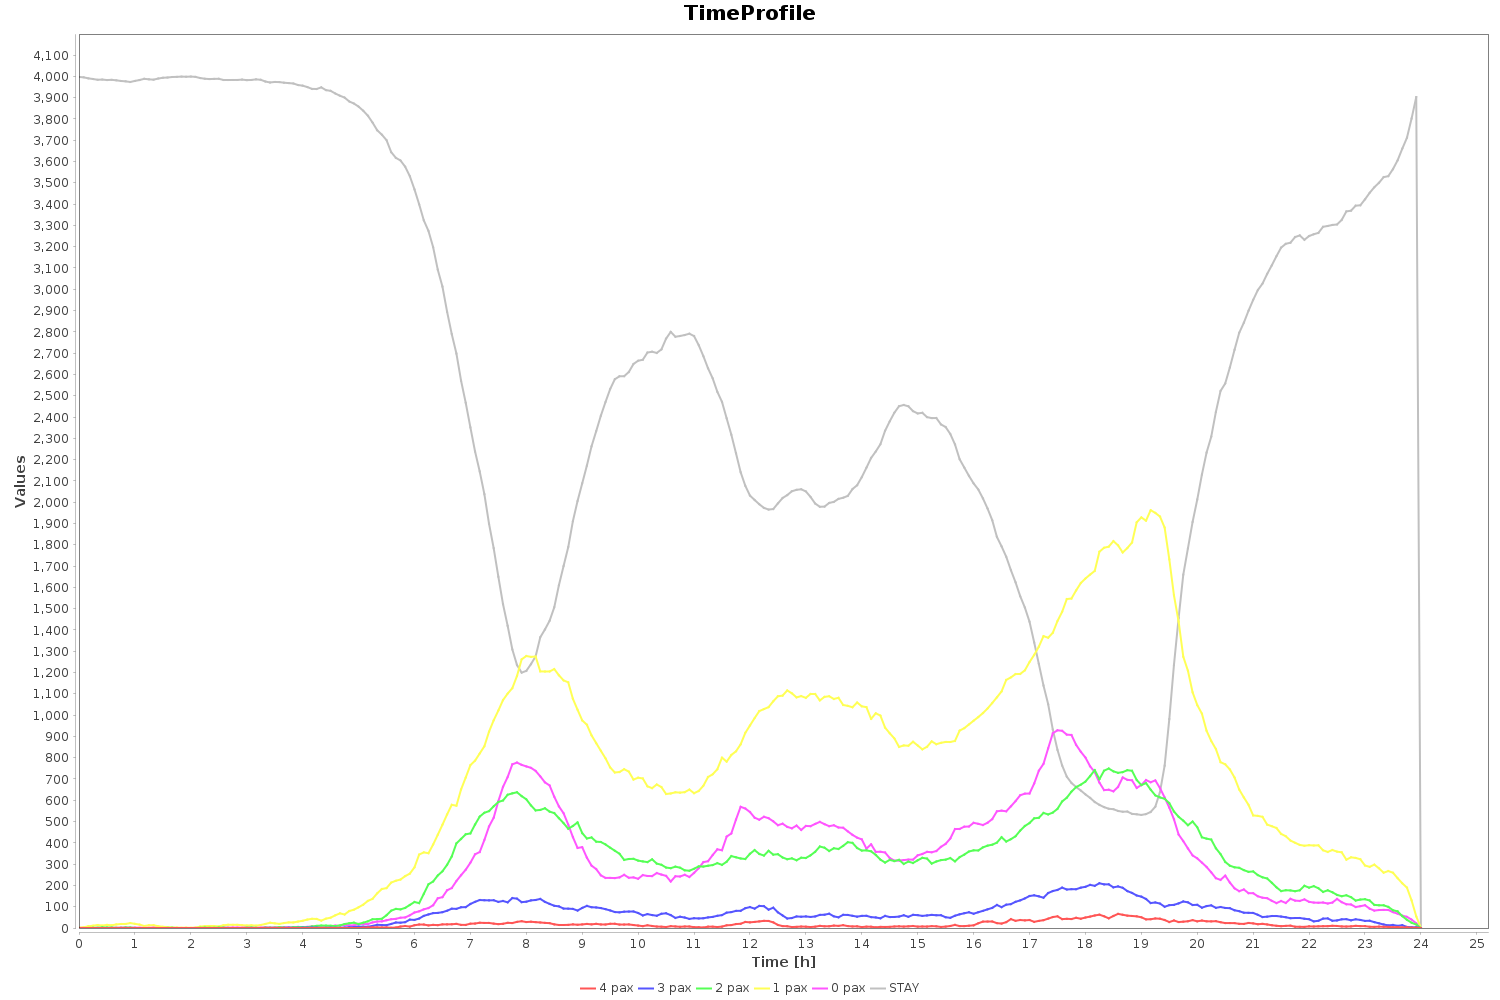

In [6]:
display(plotting_utils.show_modeshare(work_folder + 'no_rejections_4000_10_pct_average_shapefile'))
display(plotting_utils.show_occupancy_profile(work_folder + 'no_rejections_4000_10_pct_average_shapefile'))

count         mean          std  min         25%          50%  \
0  189684.0  2243.405472  2717.323618  0.0  441.413311  1117.201883   

           75%          90%          95%           99%          max  
0  2989.463268  6035.557341  8214.858111  12146.662747  22225.00171

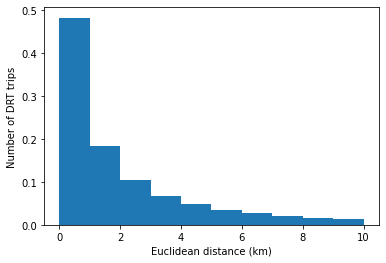

In [7]:
plotting_utils.plot_euclidean_distance_ditribution(data_10_pct_average_shapefile)

In [8]:
start_time = 6
end_time = 24
bin_duration_min = 15
min_distance = 250
max_distance = 10000
bin_distance_m = 200

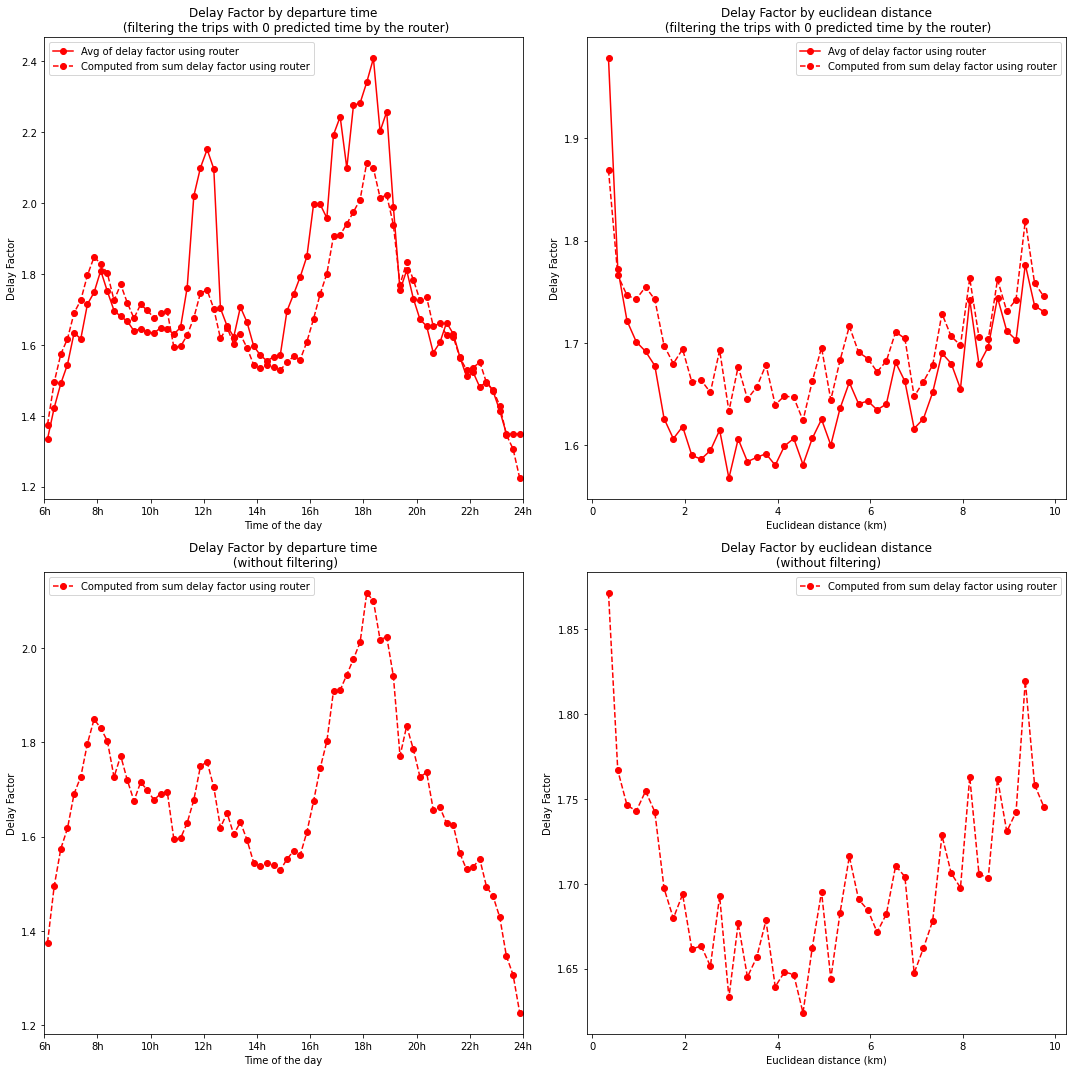

In [14]:
plotting_utils.plot_delay_factor(data_10_pct_average_shapefile, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=50, plot_estimated=False)

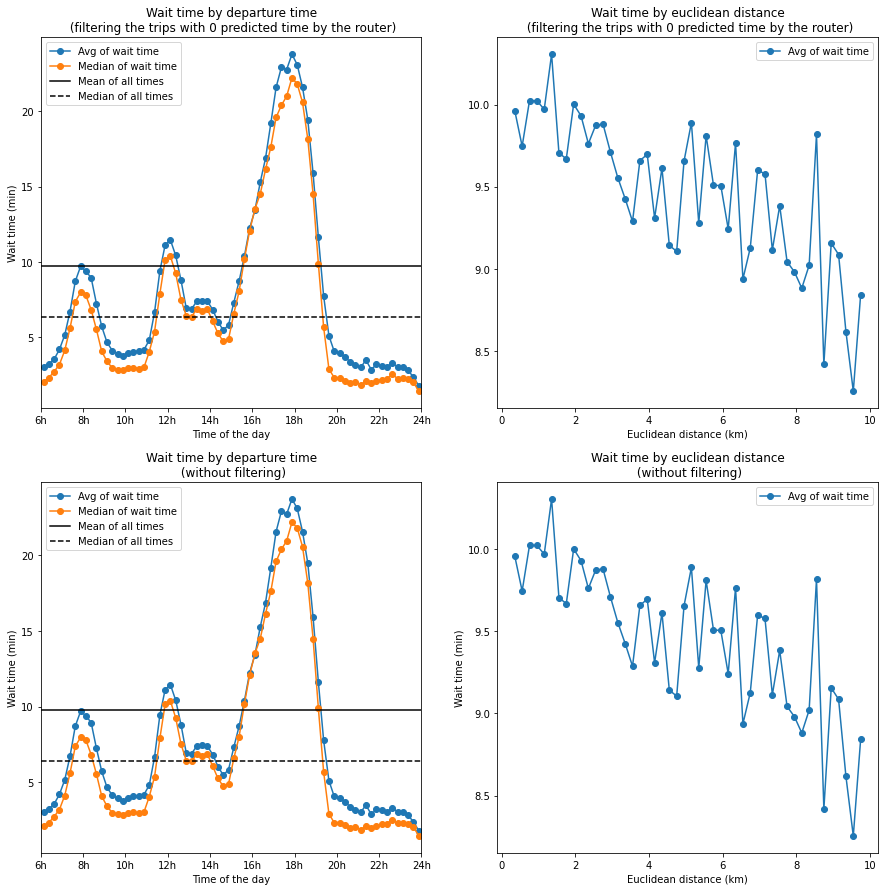

In [15]:
plotting_utils.plot_waiting_time(data_10_pct_average_shapefile, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=50)

In [16]:
lake_path = "/cluster/work/ivt_vpl/mfrancesc/lake/g1s20.shp"
zurich_districts_path = "/cluster/work/ivt_vpl/mfrancesc/city_districts/data/stzh.adm_stadtkreise_v.shp"
zurich_shp_path = '/cluster/work/ivt_vpl/mfrancesc/ScenarioBoundary/zurich_city_5km.shp'

Imputing 12  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.12it/s]


no. of trips outside the district:  95785


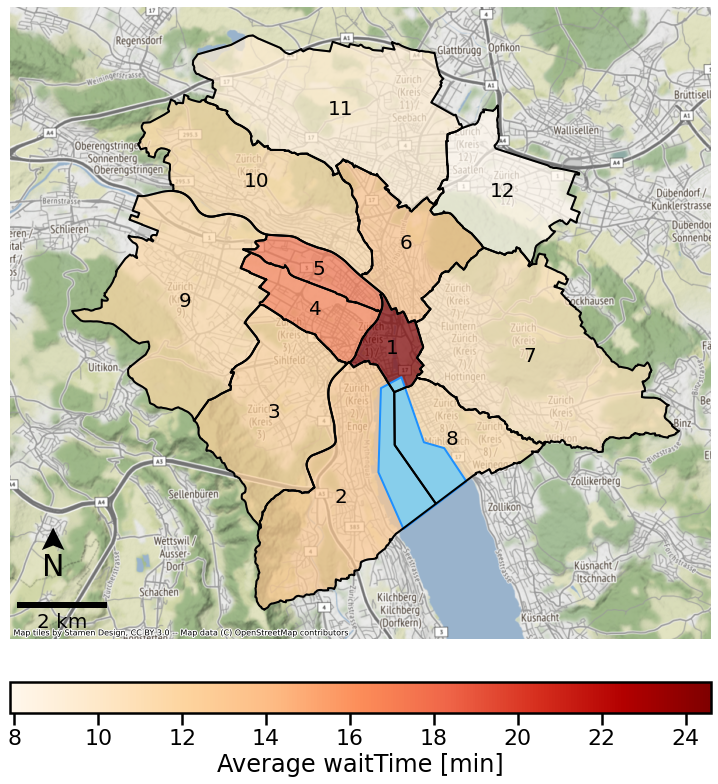

In [19]:
plotting_utils.plot_districts_wait_time(data_10_pct_average_shapefile['drt_trips_stats'][-1], lake_path, zurich_districts_path)

Imputing 1621  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.43it/s]


Imputing 429  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.90it/s]


Imputing 198  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.70it/s]


Imputing 116  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 13.61it/s]


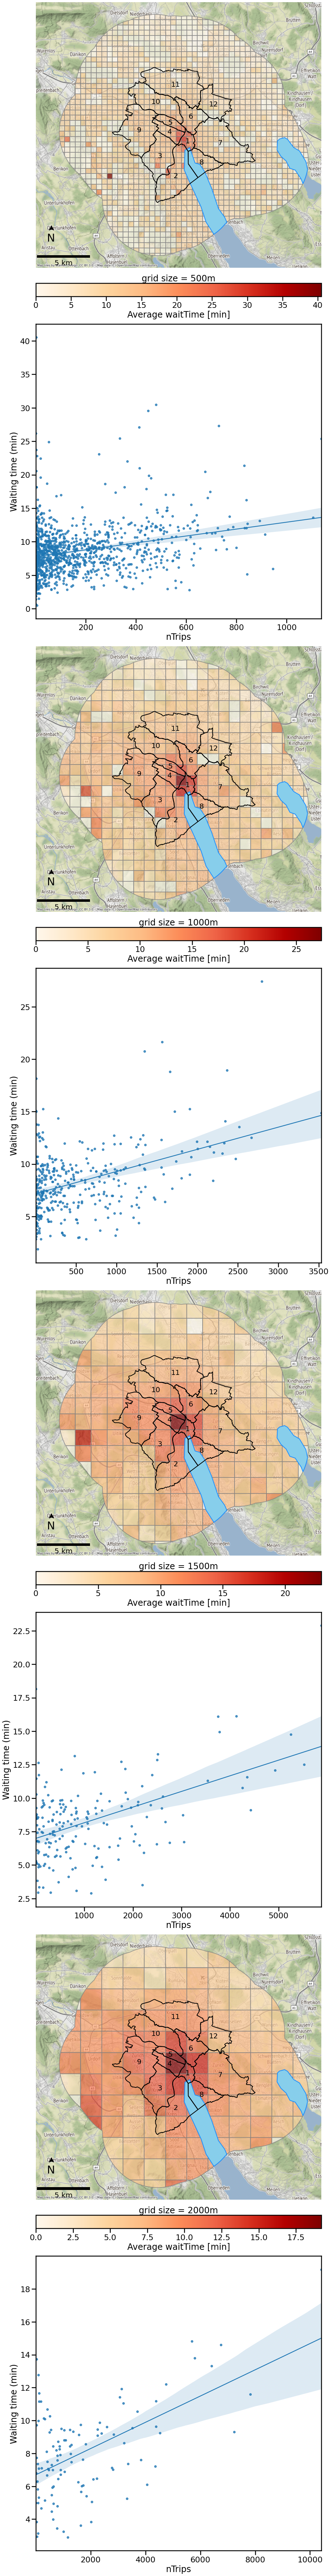

In [20]:
grid_sizes = [500,1000,1500,2000]
plotting_utils.plot_multigrid_wait_time(grid_sizes, data_10_pct_average_shapefile['drt_trips_stats'][-1], zurich_shp_path, 
                         lake_path, zurich_districts_path, map_limit=None)


Imputing 12  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.23it/s]


Imputing 12  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 13.61it/s]


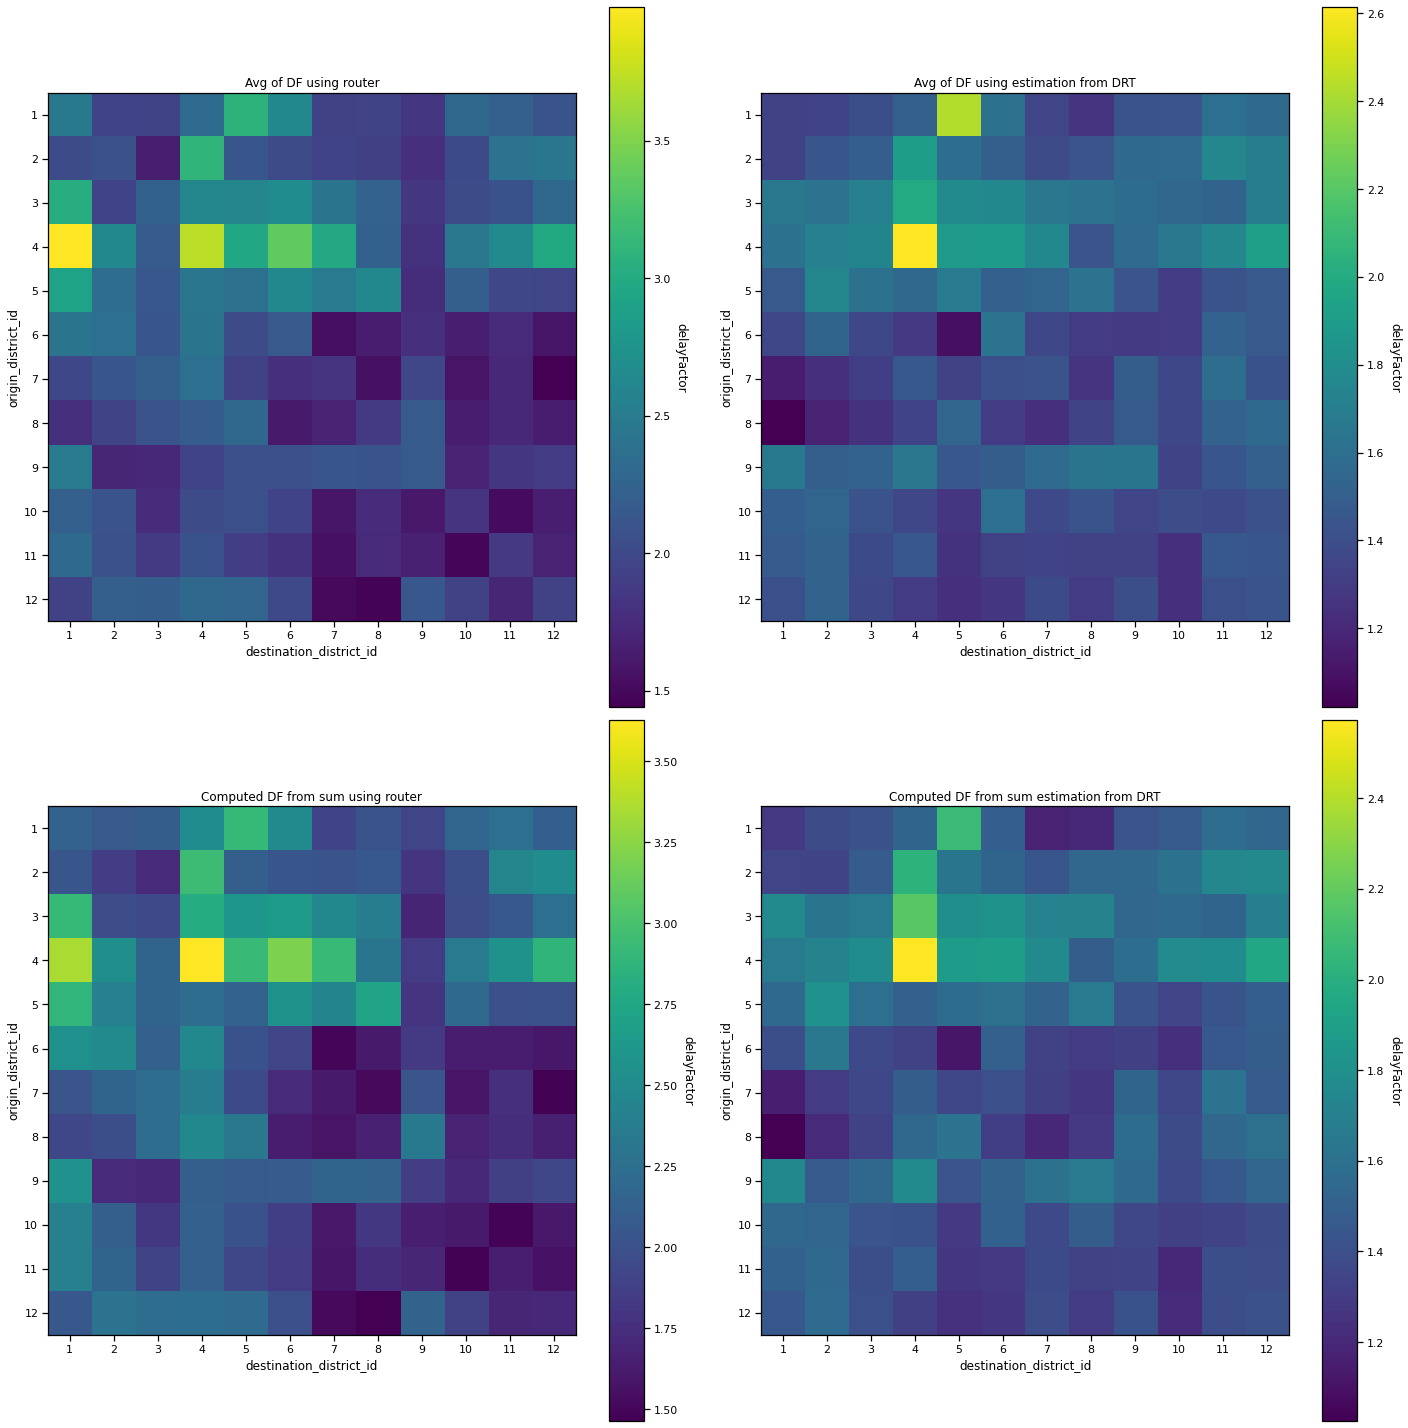

In [21]:
plotting_utils.plot_OD_delayFactor_heatmaps(data_10_pct_average_shapefile['drt_trips_stats'][-1], 
                                            zurich_districts_path)

In [15]:
last_drt_trips_stats = data_10_pct_average_shapefile['drt_trips_stats'][-1].copy(deep=True)
last_drt_trips_stats['euclidean_distance'] = np.sqrt((last_drt_trips_stats.startX - last_drt_trips_stats.endX)**2 + 
        (last_drt_trips_stats.startY - last_drt_trips_stats.endY)**2)

In [17]:
last_drt_trips_stats[last_drt_trips_stats.routerUnsharedTime == 0].euclidean_distance.describe()

count    1717.000000
mean      127.842803
std        72.142961
min         0.000000
25%        77.463297
50%       111.904398
75%       158.968567
max       461.110188
Name: euclidean_distance, dtype: float64